In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
import numpy as np
!pip install transformers

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.0 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML JComp/FinalCovidTweets.csv",encoding="utf8")
df.head()

<ipython-input-2-f860e168db25>:1: DtypeWarning: Columns (0,1,6,7,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML JComp/FinalCovidTweets.csv",encoding="utf8")


,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0,False,0.125000,0.00,Neutral
1,2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0,False,0.033333,0.00,Neutral
2,6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0.0,4,False,0.500000,-0.10,Negative
3,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0.0,0,False,0.000000,0.00,Neutral
4,10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0.0,0,False,0.333333,0.25,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116069 entries, 0 to 116068
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             116069 non-null  object 
 1   id                     116068 non-null  object 
 2   user_name              116068 non-null  object 
 3   user_location          116068 non-null  object 
 4   user_description       116068 non-null  object 
 5   user_created           116060 non-null  object 
 6   user_followers         116060 non-null  object 
 7   user_friends           116060 non-null  object 
 8   user_favourites        116060 non-null  object 
 9   user_verified          116057 non-null  object 
 10  date                   116057 non-null  object 
 11  text                   116057 non-null  object 
 12  hashtags               116054 non-null  object 
 13  source                 116054 non-null  object 
 14  retweets               116054 non-nu

In [ ]:
df.isna().sum()

Unnamed: 0                0
id                        1
user_name                 1
user_location             1
user_description          1
user_created              9
user_followers            9
user_friends              9
user_favourites           9
user_verified            12
date                     12
text                     12
hashtags                 15
source                   15
retweets                 15
favorites                15
is_retweet               23
TextBlob_Subjectivity    23
TextBlob_Polarity        23
Sentiment                23
dtype: int64

In [ ]:
df.drop(['id','user_created','user_name','is_retweet','user_followers','user_description','user_friends','user_favourites','date','source','favorites'],axis="columns",inplace=True)
df.isna().sum()

Unnamed: 0                0
user_location             1
user_verified            12
text                     12
hashtags                 15
retweets                 15
TextBlob_Subjectivity    23
TextBlob_Polarity        23
Sentiment                23
dtype: int64

In [ ]:
df.dropna(subset=["user_location","user_verified","retweets","Sentiment","text","user_verified"],inplace=True)
df.drop_duplicates(subset="text",inplace=True)
df.shape

(115838, 9)

In [ ]:
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,Neutral
1,1,2,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,Neutral
2,2,6,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,Negative
3,3,9,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,Neutral
4,4,10,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,Positive


In [ ]:
df.drop(['index','Unnamed: 0'],axis="columns",inplace=True)
df.head()

,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,Neutral
1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,Neutral
2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,Negative
3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,Neutral
4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sentiment']=le.fit_transform(df["Sentiment"])
y=df['Sentiment']
df.reset_index(inplace=True)
df.head()

,index,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2


Output Sentiment is<br>
0 - Negative<br>
1 - Neutral<br>
2 - Positive<br>

Text(0.5, 1.0, 'Class Distribution')

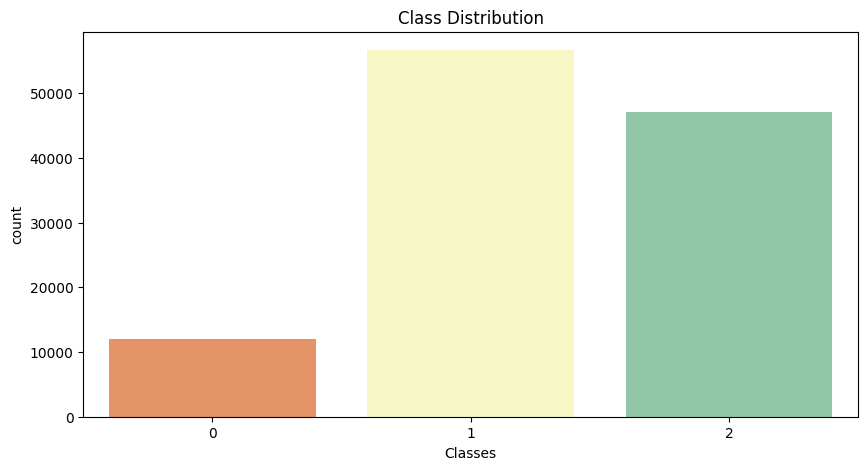

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Sentiment, palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution')

In [ ]:
df=df.groupby('Sentiment').head(6000)
df.shape

(18000, 9)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2


In [ ]:
df.drop(['index'],axis='columns',inplace=True)

In [ ]:
import re
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
wordnet = WordNetLemmatizer()

In [ ]:
df.isnull().sum()

user_location            0
user_verified            0
text                     0
hashtags                 0
retweets                 0
TextBlob_Subjectivity    0
TextBlob_Polarity        0
Sentiment                0
dtype: int64

In [ ]:
corpus=[]
for i in range(0, len(df['text'])):
    print(i,df['text'][i])
    review = re.sub(r'http\S+',' ', df['text'][i])#To remove any url
    review = re.sub(r'pic.twitter.com/[\w]*',' ', review)# To remove any pic from tweet
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split() # to make a list of words
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus[0]

Streaming output truncated to the last 5000 lines.
14864 @CBCAlerts Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 7… https://t.co/tLvfRGDFuj
14865 Austria led by @sebastiankurz in Russian Vassal Status 
Now soon Austria seem to waste taxpayer funds on #SputnikV… https://t.co/h63ylJpXnd
14866 As millions wait to get vaccinated &amp; we wrangle over the price of #SputnikV for past number of weeks &amp; debate role… https://t.co/DelzCUmEXj
14867 Who is eating alone today because Doug Ford and Trudeau Toronto Ontario Canada forced you to stay home #lockdown no… https://t.co/s8LZFGIUwa
14868 @DanielKorski Absolutely no side effects... #SputnikV https://t.co/aRPve0Ic8r
14869 @CBCAlerts Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 7… https://t.co/JyetKHTcwx
14870 Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 785  new cas… h

'folk said daikon paste could treat cytokine storm pfizerbiontech'

In [ ]:
corpus

['folk said daikon paste could treat cytokine storm pfizerbiontech',
 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year',
 'bit sad claim fame success vaccination patriotic competition usa canada uk',
 'covidvaccine state start getting covid vaccine monday u say pakustv nyc healthcare globalgoals',
 'death closing mark million people wait pfizerbiontech vaccine first u',
 'trump announces vaccine rollout le hour first american vaccinated',
 'updated yellowfever amp covid immunitypassports part two sarscov pfizerbiontech britain december',
 'coronavirus iran report new case death last hour iran coronavirus pfizerbiontech',
 'pfizer rake billion expensive covidvaccine albertbourla refuse cut price lowe',
 'trump administration failed deliver vaccine promise shocker covidiots coronavirus covidvaccine',
 'anyone wondering day pfizerbiontech approval uk people getting vaccinated tol',
 'trump announces vaccine rollout le hour first american vac

In [ ]:
print("Original Tweet: ",df['text'][0])
print("Preprocessed tweet: ",corpus[0])
len(df)

Original Tweet:  Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
Preprocessed tweet:  folk said daikon paste could treat cytokine storm pfizerbiontech


18000

In [ ]:
#Visualize and view the most common words in tweets
word_list=[word for line in corpus for word in line.split()]
count_words=Counter(word_list).most_common(50)
words=pd.DataFrame(count_words)
words.columns=['word','freq']
px.bar(words, x='word', y='freq', title='Most Common Words')

In [ ]:
preprocessed=pd.DataFrame(corpus)
df=df.assign(Clean=corpus)
df

,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment,Clean
0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1,folk said daikon paste could treat cytokine st...
1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1,coronavirus sputnikv astrazeneca pfizerbiontec...
2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0,bit sad claim fame success vaccination patriot...
3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1,covidvaccine state start getting covid vaccine...
4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2,death closing mark million people wait pfizerb...
...,...,...,...,...,...,...,...,...,...
17995,"Toronto, Canada and Worldwide",False,@JustinTrudeau Canada stop politicizing #vacci...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,justintrudeau canada stop politicizing vaccine...
17996,"Toronto, Canada and Worldwide",False,@MailOnline Canada stop politicizing #vaccine ...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,mailonline canada stop politicizing vaccine to...
17997,"Toronto, Canada and Worldwide",False,@fordnation Canada stop politicizing #vaccine ...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,fordnation canada stop politicizing vaccine to...
17998,"Toronto, Canada and Worldwide",False,@CBCNL @CBCNews Canada stop politicizing #vacc...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,cbcnl cbcnews canada stop politicizing vaccine...


In [ ]:
final=df[['Clean','Sentiment']]

In [ ]:
X=list(final['Clean'])
y=list(final['Sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=37) 

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
train_encodding = tokenizer(X_train, return_tensors="np",truncation=True, padding=True)
test_encodding = tokenizer(X_test, return_tensors="np", truncation=True, padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
train_data=dict(train_encodding)
test_data=dict(test_encodding)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load and compile our model
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 3)
# Lower learning rates are often better for fine-tuning transformers
model.compile(optimizer=Adam(3e-5), metrics=['accuracy'])

model.fit(train_data, y_train, epochs=10, verbose=1)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


Epoch 1/10
450/450 [==============================] - 157s 260ms/step - loss: 0.5826 - accuracy: 0.7737
Epoch 2/10
450/450 [==============================] - 113s 252ms/step - loss: 0.3228 - accuracy: 0.8947
Epoch 3/10
450/450 [==============================] - 113s 252ms/step - loss: 0.2230 - accuracy: 0.9309
Epoch 4/10
450/450 [==============================] - 110s 244ms/step - loss: 0.1491 - accuracy: 0.9551
Epoch 5/10
450/450 [==============================] - 109s 243ms/step - loss: 0.0980 - accuracy: 0.9706
Epoch 6/10
450/450 [==============================] - 109s 242ms/step - loss: 0.0663 - accuracy: 0.9797
Epoch 7/10
450/450 [==============================] - 109s 243ms/step - loss: 0.0531 - accuracy: 0.9841
Epoch 8/10
450/450 [==============================] - 109s 242ms/step - loss: 0.0419 - accuracy: 0.9867
Epoch 9/10
450/450 [==============================] - 109s 242ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 10/10
450/450 [==============================] - 109s 242m

In [ ]:
score=model.evaluate(test_data,y_test)

113/113 [==============================] - 15s 109ms/step - loss: 0.5902 - accuracy: 0.8833


In [ ]:
y_pred=model.predict(test_data)

113/113 [==============================] - 20s 122ms/step


In [ ]:
print(y_pred.logits[5])
print(X_test[5])
print(np.argmax(y_pred.logits[5]))

[-4.038816  -1.9561343  5.499138 ]
first dose done wondering second pfyzer dose available covid pfizervaccine
2


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

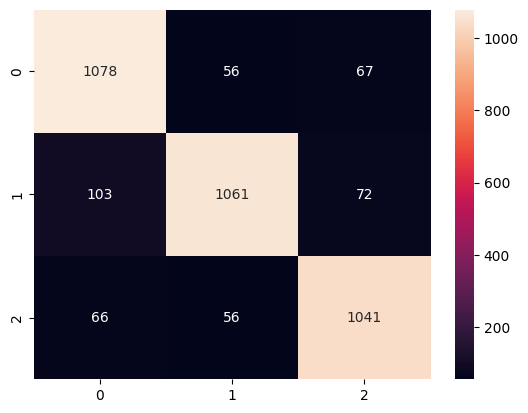

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred.logits.argmax(1))
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
f1_score(y_test,y_pred.logits.argmax(1),average="weighted")

0.8833159791821994

In [ ]:
print("Precision Score : ",precision_score(y_test,y_pred.logits.argmax(1),average="micro"))
print("Recall Score :" , recall_score(y_test, y_pred.logits.argmax(1),average="micro") )

Precision Score :  0.8833333333333333
Recall Score : 0.8833333333333333
